# Project 4: Regression Analysis and Define Your Own Task!

## Group Members
- Shaira Alam

- Vani Agrawal 

- Dhakshina Ilango

# Imports

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import issparse

# Question 1

## Dataset 1

In [4]:
# Read the CSV file into a DataFrame
diamonds_data = pd.read_csv("diamonds_ece219.csv")
diamonds_data_numbers = diamonds_data.select_dtypes(include=['number'])
diamonds_data_objects = diamonds_data.select_dtypes(include=['object'])

# Display the first few rows of the DataFrame to verify data is loaded correctly
print(diamonds_data.head())

   Unnamed: 0 color clarity  carat        cut   symmetry     polish  \
0           0     E    VVS2   0.09  Excellent  Very Good  Very Good   
1           1     E    VVS2   0.09  Very Good  Very Good  Very Good   
2           2     E    VVS2   0.09  Excellent  Very Good  Very Good   
3           3     E    VVS2   0.09  Excellent  Very Good  Very Good   
4           4     E    VVS2   0.09  Very Good  Very Good  Excellent   

   depth_percent  table_percent  length  width  depth girdle_min girdle_max  \
0           62.7           59.0    2.85   2.87   1.79          M          M   
1           61.9           59.0    2.84   2.89   1.78        STK        STK   
2           61.1           59.0    2.88   2.90   1.77         TN          M   
3           62.0           59.0    2.86   2.88   1.78          M        STK   
4           64.9           58.5    2.79   2.83   1.82        STK        STK   

   price  
0    200  
1    200  
2    200  
3    200  
4    200  


## Dataset 2

In [5]:
! pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

## 1.1
### Plot a heatmap of the Pearson correlation matrix of the dataset columns. 

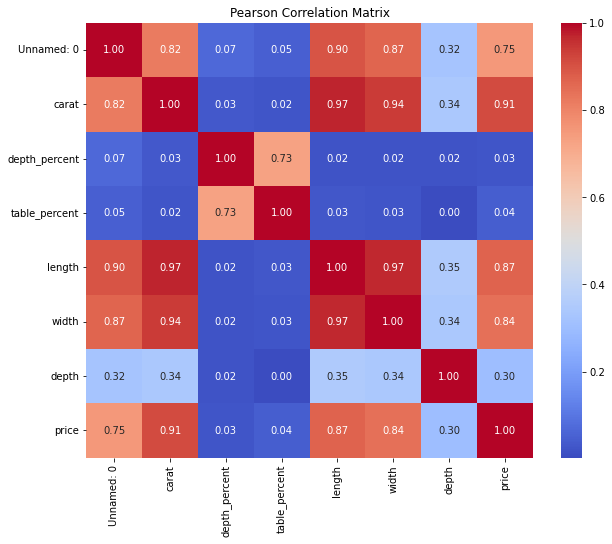

In [7]:
# Calculate the Pearson correlation matrix
corr_matrix = diamonds_data_numbers.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()


### Report which features have the highest absolute correlation with the target variable. 

In [8]:
# Find features with highest absolute correlation with the target variable
target_corr = corr_matrix['price'].abs().sort_values(ascending=False)
highest_corr_features = target_corr[1:]  # Excluding the target variable itself

print("Features with highest absolute correlation with the target variable (price):\n", highest_corr_features)

Features with highest absolute correlation with the target variable (price):
 carat            0.913479
length           0.869521
width            0.841887
Unnamed: 0       0.753482
depth            0.299696
table_percent    0.042453
depth_percent    0.025469
Name: price, dtype: float64


### In the context of either dataset, describe what the correlation patterns suggest.

## 1.2

### Plot the histogram of numerical features.

<Figure size 864x720 with 0 Axes>

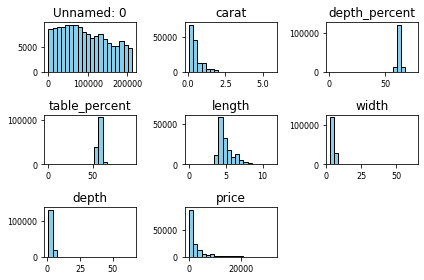

Skewness of numerical features:
Unnamed: 0        0.263138
carat             2.331773
depth_percent   -13.559608
table_percent   -11.046563
length            1.283604
width             4.115348
depth            27.493299
price             3.071737
dtype: float64


In [9]:
# Plot histograms of numerical features
plt.figure(figsize=(12, 10))
diamonds_data_numbers.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout()
plt.show()

# Check skewness of numerical features
skewness = diamonds_data_numbers.skew()
print("Skewness of numerical features:")
print(skewness)

# Handle high skewness using preprocessing techniques (e.g., log transformation)
skewed_features = skewness[abs(skewness) > 1].index
for feature in skewed_features:
    diamonds_data_numbers[feature] = np.log1p(diamonds_data_numbers[feature])

### What preprocessing can be done if the distribution of a feature has high skewness?

## 1.3

### Construct and inspect the box plot of categorical features vs target variable.

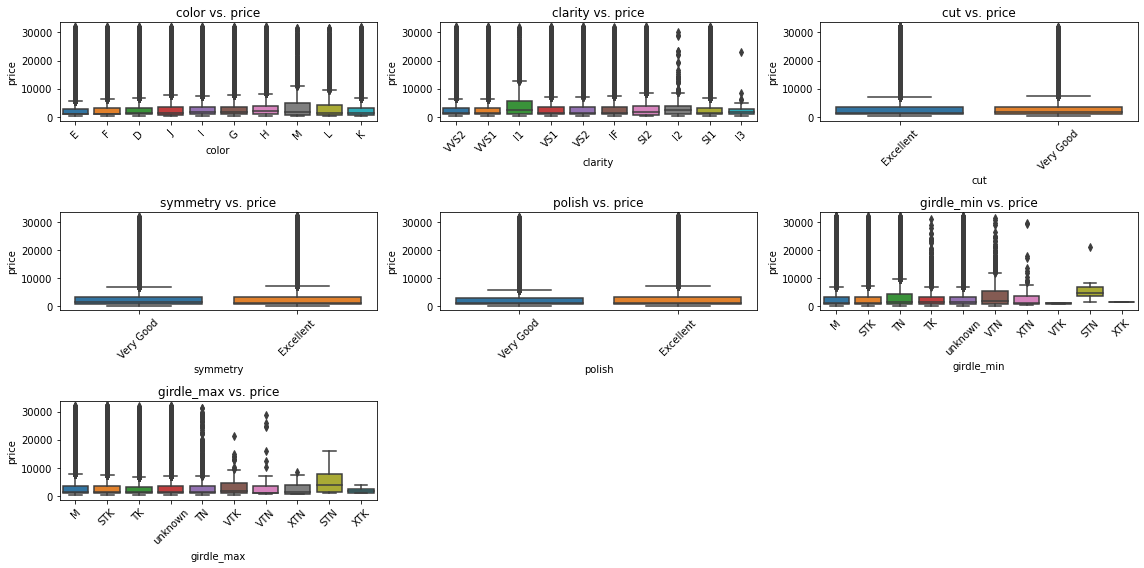

In [10]:
# Visualize box plots of categorical features vs. target variable (price)
num_plots = len(diamonds_data_objects.columns)
num_rows = (num_plots - 1) // 3 + 1  # Calculate the number of rows needed for subplots
plt.figure(figsize=(16, 8))
for i, col in enumerate(diamonds_data_objects.columns, start=1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=col, y='price', data=diamonds_data)
    plt.title(f'{col} vs. price')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### What do you find?

## 1.4
For the Diamonds dataset, plot the counts by color, cut and clarity.

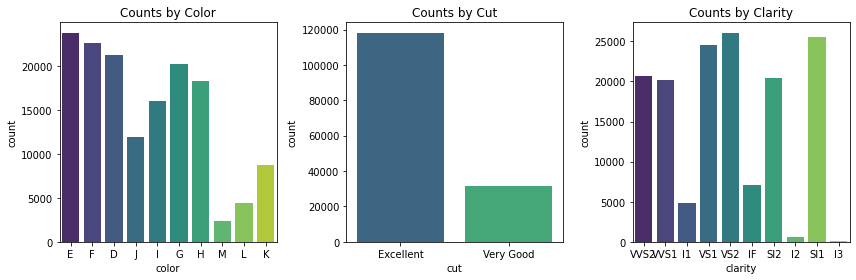

In [11]:
# Plot counts by color
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='color', data=diamonds_data, palette='viridis')
plt.title('Counts by Color')

# Plot counts by cut
plt.subplot(1, 3, 2)
sns.countplot(x='cut', data=diamonds_data, palette='viridis')
plt.title('Counts by Cut')

# Plot counts by clarity
plt.subplot(1, 3, 3)
sns.countplot(x='clarity', data=diamonds_data, palette='viridis')
plt.title('Counts by Clarity')

plt.tight_layout()
plt.show()

# Question 2

## 2.1
Standardize feature columns and prepare them for training.

In [12]:
# Separate features (X) and target variable (y)
X = diamonds_data.drop(columns=['price'])  # Features (all columns except 'price')
y = diamonds_data['price']  # Target variable

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Prepare data for training (split into train and test sets)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the preprocessor on the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrices to dense arrays if necessary
if issparse(X_train):
    X_train = X_train.toarray()

if issparse(X_test):
    X_test = X_test.toarray()

# Drop rows with missing values in Y_train
Y_train = Y_train.dropna().reset_index(drop=True)
missing_indices = Y_train[Y_train.isnull()].index
X_train_preprocessed = np.delete(X_train, missing_indices, axis=0)
X_train = X_train_preprocessed

## 2.2

### Describe how this step qualitatively affects the performance of your models in terms of test RMSE. 

### Is it true for all model types? 

### Also list two features for either dataset that has the lowest MI w.r.t to the target.

# Question 3

## 3.1 
Training: train multiple algorithms and compare their performance using average RMSE from 10-fold cross-validation

In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Perform 10-fold cross-validation and calculate average RMSE for training for each algorithm
num_folds = 10
results_training = {}

for model_name, model in models.items():
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X_train, Y_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        Y_train_fold, Y_test_fold = Y_train[train_index], Y_train[test_index]

        # Fit the model on training data
        model.fit(X_train_fold, Y_train_fold)

        # Predict on validation data
        Y_pred_fold = model.predict(X_test_fold)

        # Calculate RMSE for validation set
        rmse = np.sqrt(mean_squared_error(Y_test_fold, Y_pred_fold))
        rmse_scores.append(rmse)

    # Calculate average RMSE across all folds
    avg_rmse = np.mean(rmse_scores)
    results_training[model_name] = avg_rmse

# Print average RMSE for each algorithm
for model_name, avg_rmse in results_training.items():
    print(f'{model_name}: Average RMSE (Training) = {avg_rmse:.2f}')

Linear Regression: Average RMSE (Training) = 1475.46
Decision Tree: Average RMSE (Training) = 16.93
Random Forest: Average RMSE (Training) = 19.81


## 3.2 
Evaluation: Perform 10-fold cross-validation and measure average RMSE errors for training and validation sets. For random forest model, measure “Out-of-Bag Error” (OOB) as well.

In [19]:
# Dictionary to store results
results = {}

# Loop through models
for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
    
    # Calculate RMSE for training set
    rmse_train_scores = np.sqrt(cv_scores)
    avg_rmse_train = np.mean(rmse_train_scores)

    # Store training set scores
    results[model_name] = {'Training RMSE': rmse_train_scores}
    
    # Perform cross-validation for validation set
    rmse_val_scores = np.sqrt(cv_scores)
    avg_rmse_val = np.mean(rmse_val_scores)

    # Store validation set scores
    results[model_name]['Validation RMSE'] = rmse_val_scores

    # If Random Forest, calculate OOB error
    if model_name == 'Random Forest':
        oob_predictions = np.zeros(len(Y_train))
        oob_indices = np.zeros(len(Y_train), dtype=bool)
        for indices in model.estimators_samples_:
            oob_indices[indices] = True
            oob_predictions[indices] = model.estimators_[0].predict(X_train[indices])
        oob_rmse = np.sqrt(mean_squared_error(Y_train[oob_indices], oob_predictions[oob_indices]))
        results[model_name]['OOB RMSE'] = oob_rmse
    

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_samples_'

In [21]:
# Print RMSE for training and validation sets
for model_name, scores in results.items():
    print(f'{model_name}:')
    print(f'   Average RMSE (Training): {np.mean(scores["Training RMSE"]):.2f}')
    print(f'   Average RMSE (Validation): {np.mean(scores["Validation RMSE"]):.2f}')
    # If Random Forest, calculate OOB error
    if model_name == 'Random Forest':
        print(f'   Average RMSE (OOB): {np.mean(scores["OOB RMSE"]):.2f}')

Linear Regression:
   Average RMSE (Training): 1475.85
   Average RMSE (Validation): 1475.85
Decision Tree:
   Average RMSE (Training): 18.34
   Average RMSE (Validation): 18.34
Random Forest:
   Average RMSE (Training): 21.95
   Average RMSE (Validation): 21.95


KeyError: 'OOB RMSE'

# Question 4

## 4.0 Train Models

Ordinary least squares (linear regression without regularization)

In [49]:
from sklearn.linear_model import LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_train, Y_train)

LinearRegression()

Lasso

In [50]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0) # need to tune
lasso_model.fit(X_train, Y_train)

Lasso()

Ridge regression

In [51]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0) # need to tune
ridge_model.fit(X_train, Y_train)

Ridge()

## 4.1

## 4.2

## 4.3

## 4.4

# Question 5

## 5.1

## 5.2

# Question 6

## 6.1

## 6.2

## 6.3

## 6.4

# Question 7

We will train a random forest regression model on datasets, and answer the following:
- Random forests have the following hyper-parameters:
    - Maximum number of features;
    - Number of trees;
    - Depth of each tree;

In [ ]:
from sklearn.ensemble import RandomForestRegressor

num_trees = 100
max_num_features = 'sqrt'
max_depth_tree = None

random_forest_model = RandomForestRegressor(
    n_estimators= num_trees,
    max_features= max_num_features,
    max_depth= max_depth_tree,
    random_state= 42
)

random_forest_model.fit(X_train, Y_train)

y_pred = random_forest_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))


## 7.1
Explain how these hyper-parameters affect the overall performance. Describe if
and how each hyper-parameter results in a regularization effect during training.

How each hyperparameter affects the overall performance:
1. Maximum number of features
    - incomplete
2. Number of trees
    - incomplete
3. Depth of each tree
    - incomplete

## 7.2
How do random forests create a highly non-linear decision boundary despite the fact that all we do at each layer is apply a threshold on a feature?

## 7.3
Randomly pick a tree in your random forest model (with maximum depth of 4) and plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others? Do the important features correspond to what you got in part 3.3.1?

In [ ]:
from sklearn.tree import plot_tree

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=4,
    random_state=42
)

rf_model.fit(X_train, Y_train)

tree = 0
selected_tree = rf_model.estimators_[tree]

plt.figure(figsize=(15, 10))
plot_tree(selected_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.title(f'Structure of Tree {tree + 1} (Depth: {selected_tree.get_depth()})')
plt.show()

## 7.4
Measure “Out-of-Bag Error” (OOB). Explain what OOB error and R2 score means.

# Question 8

## 8.1

## 8.2

## 8.3

# Question 9

## 9.1
Report the following statistics for each hashtag, i.e. each file has:
- Average number of tweets per hour
- Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user's followers twice as well)
- Average number of retweets per tweet

In [12]:
import json
import os

def tweet_statistics(tweet_file):
    hours = []
    followers = []
    retweets = []
    total_tweets = 0

    data_path = './ECE219_tweet_data'

    tweet_path = os.path.join(data_path, f'{tweet_file}')

    with open(tweet_path, encoding='utf8') as file:
        for line in file:
            tweet = json.loads(line)
            total_tweets += 1
            hours.append(tweet['citation_date'])
            followers.append(tweet['author']['followers'])
            retweets.append(tweet['metrics']['citations']['total'])

    avg_tweets_per_hour = total_tweets / ((max(hours) - min(hours)) / 3600.0)
    avg_followers_per_tweet = sum(followers) / float(total_tweets)
    avg_retweets_per_tweet = sum(retweets) / float(total_tweets)

    return {
        'Average tweets per hour': avg_tweets_per_hour,
        'Average followers per tweet': avg_followers_per_tweet,
        'Average retweets per tweet': avg_retweets_per_tweet
    }


In [14]:
tweetfiles = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for tweet in tweetfiles:
    stats = tweet_statistics(tweet)

    print("-"*20 + f" Statistics for: {tweet} " + "-"*20)
    print("Average number of tweets per hour: ", stats['Average tweets per hour'])
    print("Average number of followers of users posting the tweets per tweet: ", stats['Average followers per tweet'])
    print("Average number of retweets per tweet: ", stats['Average retweets per tweet'])


-------------------- Statistics for: tweets_#gohawks.txt --------------------
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
-------------------- Statistics for: tweets_#gopatriots.txt --------------------
Average number of tweets per hour:  40.95469800606194
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
-------------------- Statistics for: tweets_#nfl.txt --------------------
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
-------------------- Statistics for: tweets_#patriots.txt --------------------
Average number of tweets per hour:  750.89426460689
Average number of followers of users pos

## 9.2
Plot "number of tweets in hour" over time for #SuperBowl and #NFL (a bar plot with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet_[#hashtag].txt

In [33]:
def tweets_in_hour(tweet_file):
    hours = []

    data_path = './ECE219_tweet_data'

    tweet_path = os.path.join(data_path, f'{tweet_file}')

    with open(tweet_path, encoding="utf8") as file:
        for line in file:
            tweet = json.loads(line)
            hours.append(tweet['citation_date'])

    return hours

In [34]:
def plot_number_of_tweets_in_hour(hashtag, tweet_file):
    num_hours = tweets_in_hour(tweet_file)

    tweets_per_hour= [0] * int((max(num_hours) - min(num_hours)) / 3600 + 1)

    for i in num_hours:
        tweets_per_hour[int((i - min(num_hours)) / 3600)] += 1
    
    x_vals = [i for i in range(0, len(tweets_per_hour))]
    
    plt.bar(x_vals, tweets_per_hour, width = 1)
    plt.xlabel("Hour")
    plt.ylabel("Number of tweets")
    plt.title(f"Number of tweets in hour over time for {hashtag}")
    plt.show()

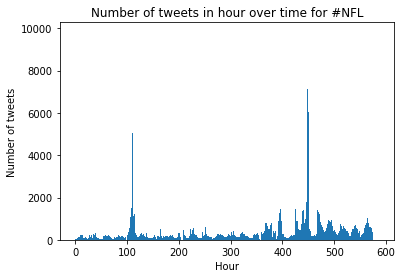

In [35]:
tweet_file = "tweets_#nfl.txt"
plot_number_of_tweets_in_hour("#NFL", tweet_file)

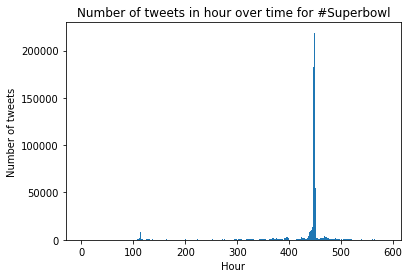

In [36]:
tweet_file = "tweets_#superbowl.txt"
plot_number_of_tweets_in_hour("#Superbowl", tweet_file)

# Question 10

## 10.1

## 10.2

## 10.3

## 10.4